In [3]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster, metrics
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 
import os
from sklearn.cluster import KMeans

In [4]:
pwd


u'/Users/marthataylor/week03_classwork/week-07/3.3-classifier-clustering/code/starter-code'

In [5]:
airport2 = pd.read_csv('../../assets/datasets/airport2.csv')


In [6]:
print airport2.shape
airport2.head()

(33, 6)


,Airport,Year,Departure Cancellations,Arrival Cancellations,Departure Diversions,Arrival Diversions
0,ABQ,2004,242,235,71,46
1,ABQ,2005,221,190,61,33
2,ABQ,2006,392,329,71,124
3,ABQ,2007,366,304,107,45
4,ABQ,2008,333,300,79,42


In [7]:
airport2['Departure Diversions'].describe()

count      33.000000
mean      346.363636
std       390.555439
min        61.000000
25%        73.000000
50%        84.000000
75%       790.000000
max      1064.000000
Name: Departure Diversions, dtype: float64

In [8]:
airport2['Airport'].unique()

array(['ABQ', 'ANC', 'ATL'], dtype=object)

In [9]:
airport2['Airport']=airport2['Airport'].apply(lambda x: 1 if x=='ANC' else 2 if x=='ATL' else 3)

In [10]:
airport2['Airport'].unique()


array([3, 1, 2])

## 1. Format the Data

Convert the class labels, in this case the airports, to numeric. *Remember*, we've truncated the airport dataset for simplicty to make this part easy! 

In [11]:
#see above

In [12]:
from sklearn.preprocessing import LabelEncoder

In [13]:
y=LabelEncoder().fit_transform(airport2['Airport'])
X=airport2.drop('Airport',axis=1)

In [14]:
pd.DataFrame(y)[0].value_counts()

2    11
1    11
0    11
Name: 0, dtype: int64

## 2. Plot the data

In [15]:
import seaborn as sns

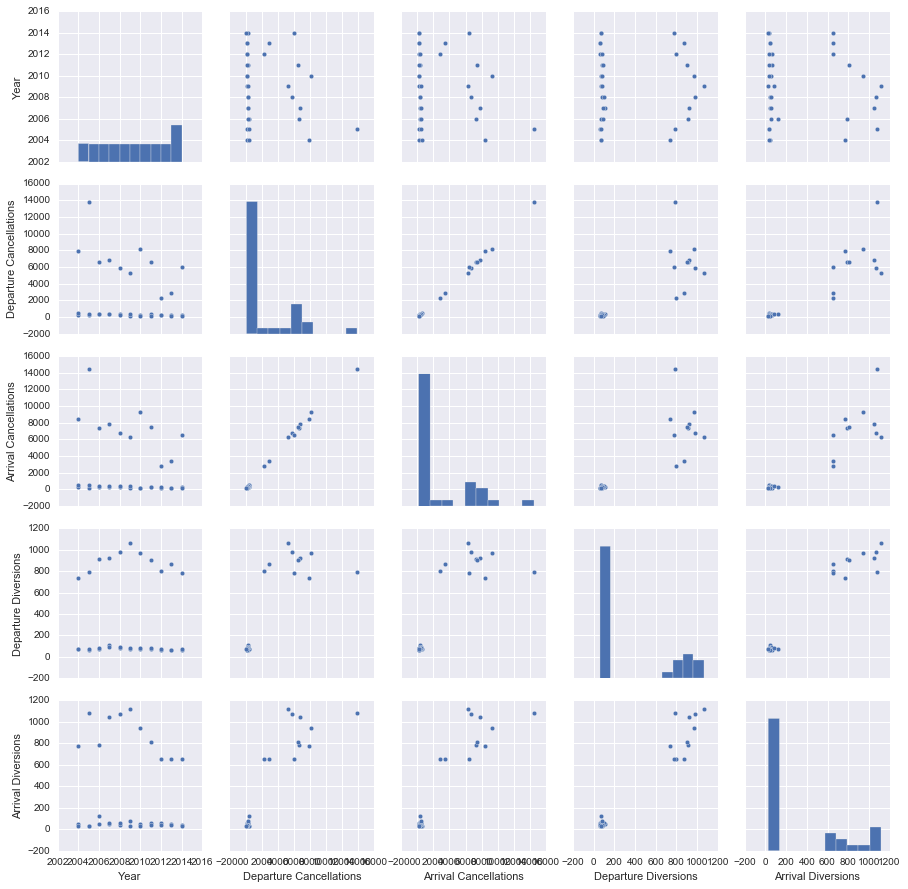

In [16]:
sns.pairplot(X)

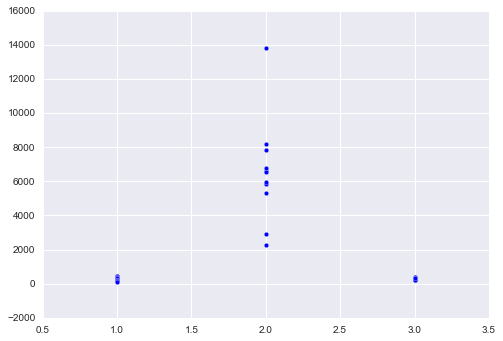

In [17]:
plt.scatter(airport2['Airport'], airport2['Departure Cancellations'])

## 3.  Perform a K-Means Clustering 

#### 3.1 Split the dataset into the attribute data and class labels

In [18]:
#scaling the data
from sklearn.preprocessing import StandardScaler


In [19]:
labels

NameError: name 'labels' is not defined

In [21]:
x=StandardScaler().fit_transform(X)
x.shape

(33, 5)

In [22]:
kmeans=KMeans(3)
kmeans.fit(x)
predictions = kmeans.predict(x)

In [23]:
predictions

array([0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [27]:
x

array([[-1.58113883, -0.62717893, -0.64478985, -0.71598822, -0.68715588],
       [-1.26491106, -0.63335711, -0.65688837, -0.74198978, -0.71947934],
       [-0.9486833 , -0.58304907, -0.6195174 , -0.71598822, -0.49321518],
       [-0.63245553, -0.59069824, -0.62623879, -0.62238263, -0.6896423 ],
       [-0.31622777, -0.60040681, -0.62731422, -0.69518698, -0.69710156],
       [ 0.        , -0.64188888, -0.66441634, -0.70818776, -0.73688427],
       [ 0.31622777, -0.63306291, -0.6603835 , -0.71598822, -0.67721021],
       [ 0.63245553, -0.59687642, -0.62892735, -0.70038729, -0.64985959],
       [ 0.9486833 , -0.62864992, -0.65930807, -0.73158915, -0.65234601],
       [ 1.26491106, -0.63012092, -0.65097354, -0.73938962, -0.68715588],
       [ 1.58113883, -0.60570239, -0.63430447, -0.728989  , -0.70953366],
       [-1.58113883, -0.55921894, -0.56493964, -0.71078791, -0.72693859],
       [-1.26491106, -0.5736347 , -0.57784473, -0.70818776, -0.72445217],
       [-0.9486833 , -0.59040404, -0.5

#### 3.2 Conduct the k-means clustering

In [28]:
X.columns

Index([u'Year', u'Departure Cancellations', u'Arrival Cancellations',
       u'Departure Diversions', u'Arrival Diversions'],
      dtype='object')

In [32]:
delays=airport2[['Departure Cancellations','Departure Diversions']].copy()

In [34]:
delays = delays.join(pd.DataFrame(predictions, columns=['predicted_class']))

In [37]:
delays.tail(2)

,Departure Cancellations,Departure Diversions,predicted_class
31,2916,870,1
32,5977,781,1


#### 3.3 Compute the labels and centroids

In [55]:
labels=kmeans.labels_
centroids=kmeans.cluster_centers_

array([[  0.00000000e+00,   1.23226618e+00,   1.25932119e+00,
          1.39911994e+00,   1.36707855e+00],
       [ -1.00929366e-17,  -6.16133089e-01,  -6.29660597e-01,
         -6.99559968e-01,  -6.83539275e-01]])

In [58]:
centroids

array([[ 0.9486833 , -0.63485752, -0.64782793, -0.71104793, -0.69560971],
       [ 0.        ,  1.23226618,  1.25932119,  1.39911994,  1.36707855],
       [-0.79056942, -0.60052939, -0.61452116, -0.68998667, -0.67348058]])

In [59]:
labels

array([2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

#### 3.4 Format the resulting predicted "y" variables and check the accuracy score, classification report, and confusion matrix

**Question**: What are we understand from this these performance metrics? 

## 4. Extra Trees Classifier

In [38]:
from sklearn.cross_validation import cross_val_score
from sklearn.tree import DecisionTreeClassifier


In [ ]:
decision_tree=DecisionTreeClassifier(
cv_decision_tree = cross_val_score(decision_tree, )

## 5. KNN Classifier

## 6. Hierarchical Clustering

#### 6.1 Create the linkage for clustering

#### 6.2 Plot the Denrogram

## Extra Trees Classifier

## KNN Classifier